In [1]:
!pip install catboost

In [72]:
import pandas as pd
import numpy as np
import catboost
%matplotlib inlineS
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import datetime

In [3]:
train = pd.read_csv (r'dataHack/train.csv')

In [4]:
pd.set_option('display.max_rows', 1000)

In [5]:
train['Дата транзакции'] = pd.to_datetime(train['Дата транзакции'])
train['Сумма в RUB'] = abs(train['Сумма в RUB'])
train[:100]

,БЕ,Дата транзакции,Сумма в RUB
0,5,2017-01-11,4.416300e+07
1,5,2017-01-18,2.960046e+07
2,5,2017-01-25,4.189707e+07
3,5,2017-02-08,2.098554e+07
4,5,2017-02-15,4.373594e+07
5,5,2017-02-22,9.434364e+07
6,5,2017-03-01,6.101577e+05
7,5,2017-03-09,4.405284e+07
8,5,2017-03-15,2.131114e+07
9,5,2017-03-22,3.578870e+07


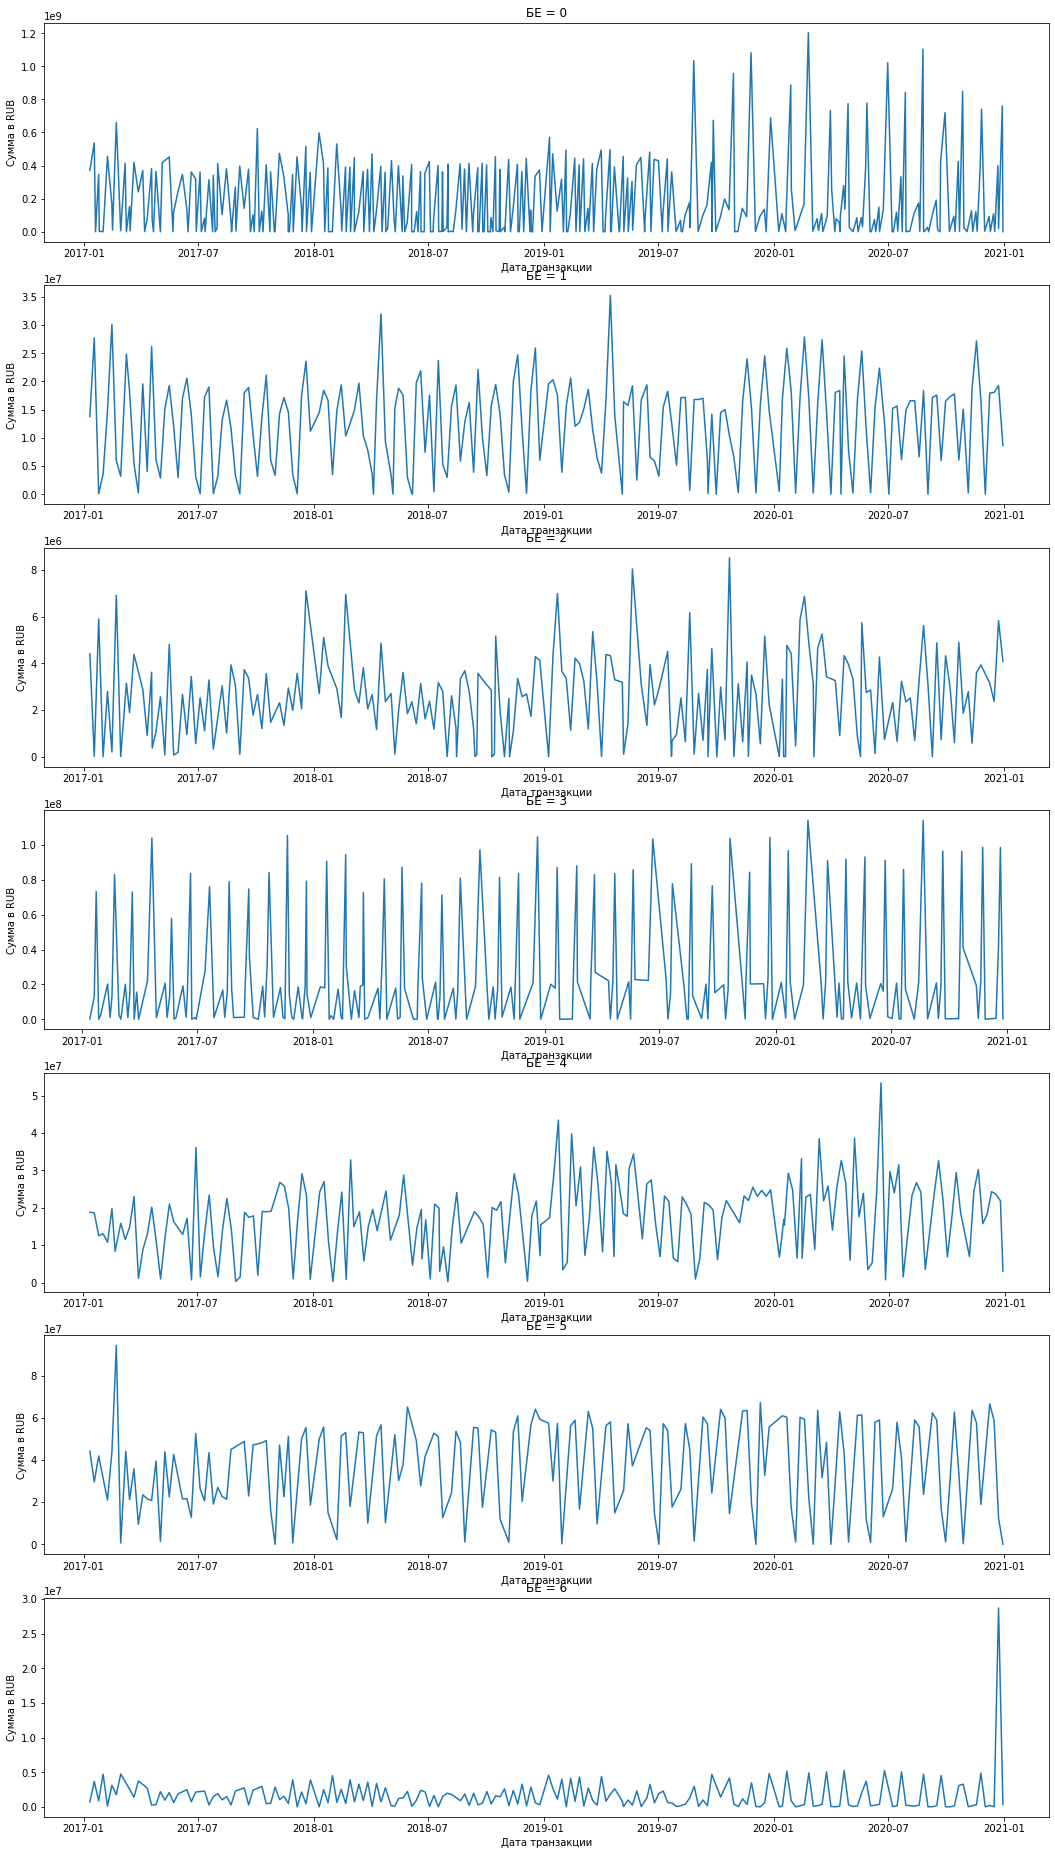

In [6]:
fig, ax = plt.subplots(7, 1, figsize=(18, 33))
for i in np.arange(0, 7):
    train_be = train[train["БЕ"] == i].reset_index(drop=True)
    date = train_be["Дата транзакции"]
    ax[i].set_title('БЕ = ' + str(i))
    ax[i].set_xlabel('Дата транзакции')
    ax[i].set_ylabel('Сумма в RUB')
    sm = train_be["Сумма в RUB"]
    ax[i].plot(date, sm)



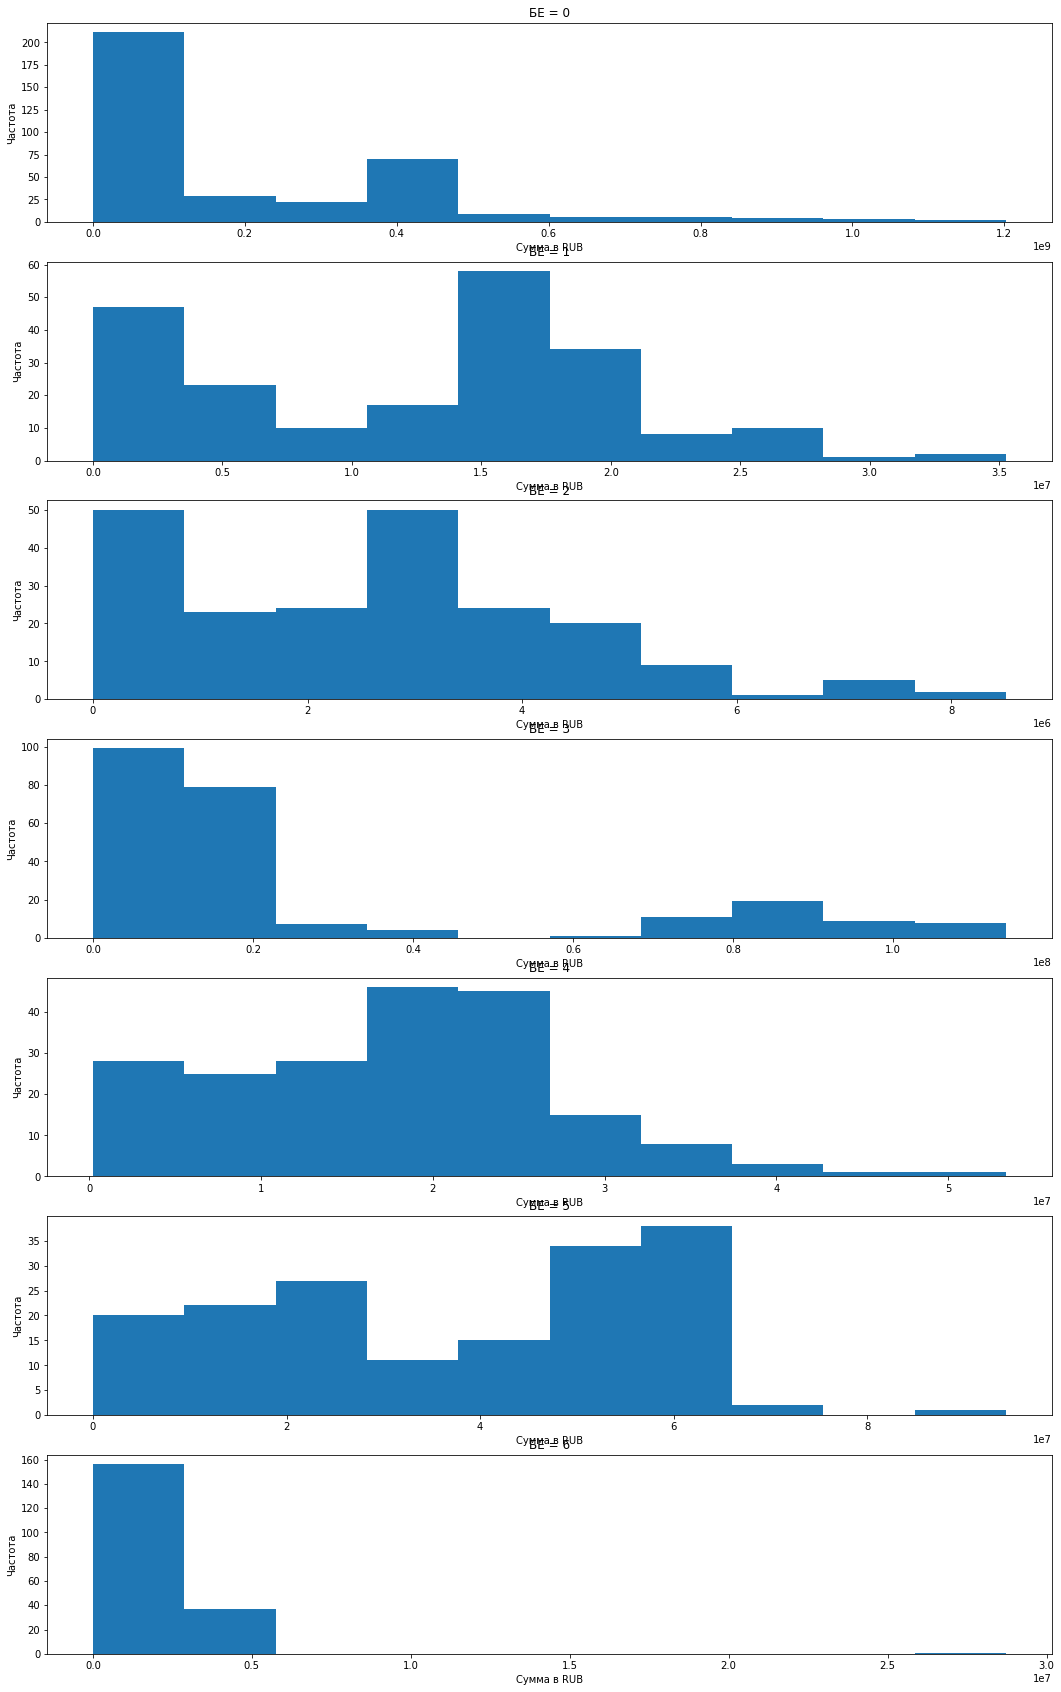

In [7]:
fig, ax = plt.subplots(7, 1, figsize=(18, 30))
for i in np.arange(0, 7):
    train_be = train[train["БЕ"] == i].reset_index(drop=True)
    date = train_be["Дата транзакции"]
    sm = train_be["Сумма в RUB"]
    ax[i].set_title('БЕ = ' + str(i))
    ax[i].set_ylabel('Частота')
    ax[i].set_xlabel('Сумма в RUB')
    ax[i].hist(sm)


In [56]:
X = train[["БЕ", "Сумма в RUB"]]
X

,БЕ,Сумма в RUB
0,5,4.416300e+07
1,5,2.960046e+07
2,5,4.189707e+07
3,5,2.098554e+07
4,5,4.373594e+07
...,...,...
1574,6,1.783439e+03
1575,6,2.029097e+05
1576,6,8.341146e+03
1577,6,2.872760e+07


In [57]:
found_date = datetime.datetime(day=1, month=1, year=2017)
d = np.array([])
for el in train["Дата транзакции"]:
    day = int((el-found_date).days)
    d = np.append(d, day)
y = pd.DataFrame(d, columns=["Дата транзакции"])
y

,Дата транзакции
0,10.0
1,17.0
2,24.0
3,38.0
4,45.0
...,...
1574,1431.0
1575,1438.0
1576,1445.0
1577,1452.0


In [58]:
#ЗНАЯ ДАТУ И ДНИ, ВЕРНУТЬ ДАТУ
def toDate(b_pd):
    b_pd = pd.DataFrame(b_pd)
    a = found_date #2017.01.01
    dates = np.array([])
    #b_pd даты переведённые в числа
    for b in b_pd.values:
        b = int(b) # datetime -> int
        bb = datetime.timedelta(days=b) #days
        cc = a+bb #date
        dates = np.append(dates, cc)
    return dates

In [59]:
from catboost import CatBoostRegressor, Pool
from catboost.utils import get_roc_curve
from catboost import cv

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=20)
X_train_origin = X_train
X_test_origin = X_test

In [61]:
scaler = preprocessing.MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
X_train

,0,1
0,1.000000,4.171489e-05
1,0.666667,1.252029e-02
2,0.833333,5.536911e-02
3,0.833333,5.066724e-02
4,0.500000,1.964044e-02
...,...,...
1258,0.000000,9.733808e-08
1259,0.333333,1.349941e-03
1260,0.500000,6.501705e-02
1261,0.666667,1.496534e-02


In [62]:
eval_pool = Pool(X_test, y_test)

In [63]:
boosting_model = CatBoostRegressor()

In [64]:
boosting_model_grid = .(n_estimators=400)

In [65]:
boosting_model.fit(X = X_train, y = y_train, eval_set=eval_pool, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [66]:
y_pred = boosting_model.predict(X_test)

In [67]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

328.500890959448

In [68]:
y_np = np.array(y_pred[:7]).astype(int)
dates = toDate(y_np)
for date in dates:
    print(date)

2019-04-02 00:00:00
2018-08-05 00:00:00
2018-08-27 00:00:00
2019-01-25 00:00:00
2018-08-21 00:00:00
2019-06-24 00:00:00
2019-06-09 00:00:00


In [69]:
X_sample = X_test_origin[:7]
X_sample

array([[3.00000000e+00, 2.02547771e+07],
       [6.00000000e+00, 9.06369427e+05],
       [0.00000000e+00, 4.25051049e+08],
       [1.00000000e+00, 1.66516225e+07],
       [0.00000000e+00, 3.47604466e+08],
       [6.00000000e+00, 1.67755159e+05],
       [3.00000000e+00, 9.64826861e+07]])

Предсказанная Дата - 2019-04-02 00:00:00
БЕ - 3
Сумма - 20254777.07006369
Предсказанная Дата - 2018-08-05 00:00:00
БЕ - 6
Сумма - 906369.4267515924
Предсказанная Дата - 2018-08-27 00:00:00
БЕ - 0
Сумма - 425051048.7898089
Предсказанная Дата - 2019-01-25 00:00:00
БЕ - 1
Сумма - 16651622.50955414
Предсказанная Дата - 2018-08-21 00:00:00
БЕ - 0
Сумма - 347604465.75159234
Предсказанная Дата - 2019-06-24 00:00:00
БЕ - 6
Сумма - 167755.15923566878
Предсказанная Дата - 2019-06-09 00:00:00
БЕ - 3
Сумма - 96482686.07006368


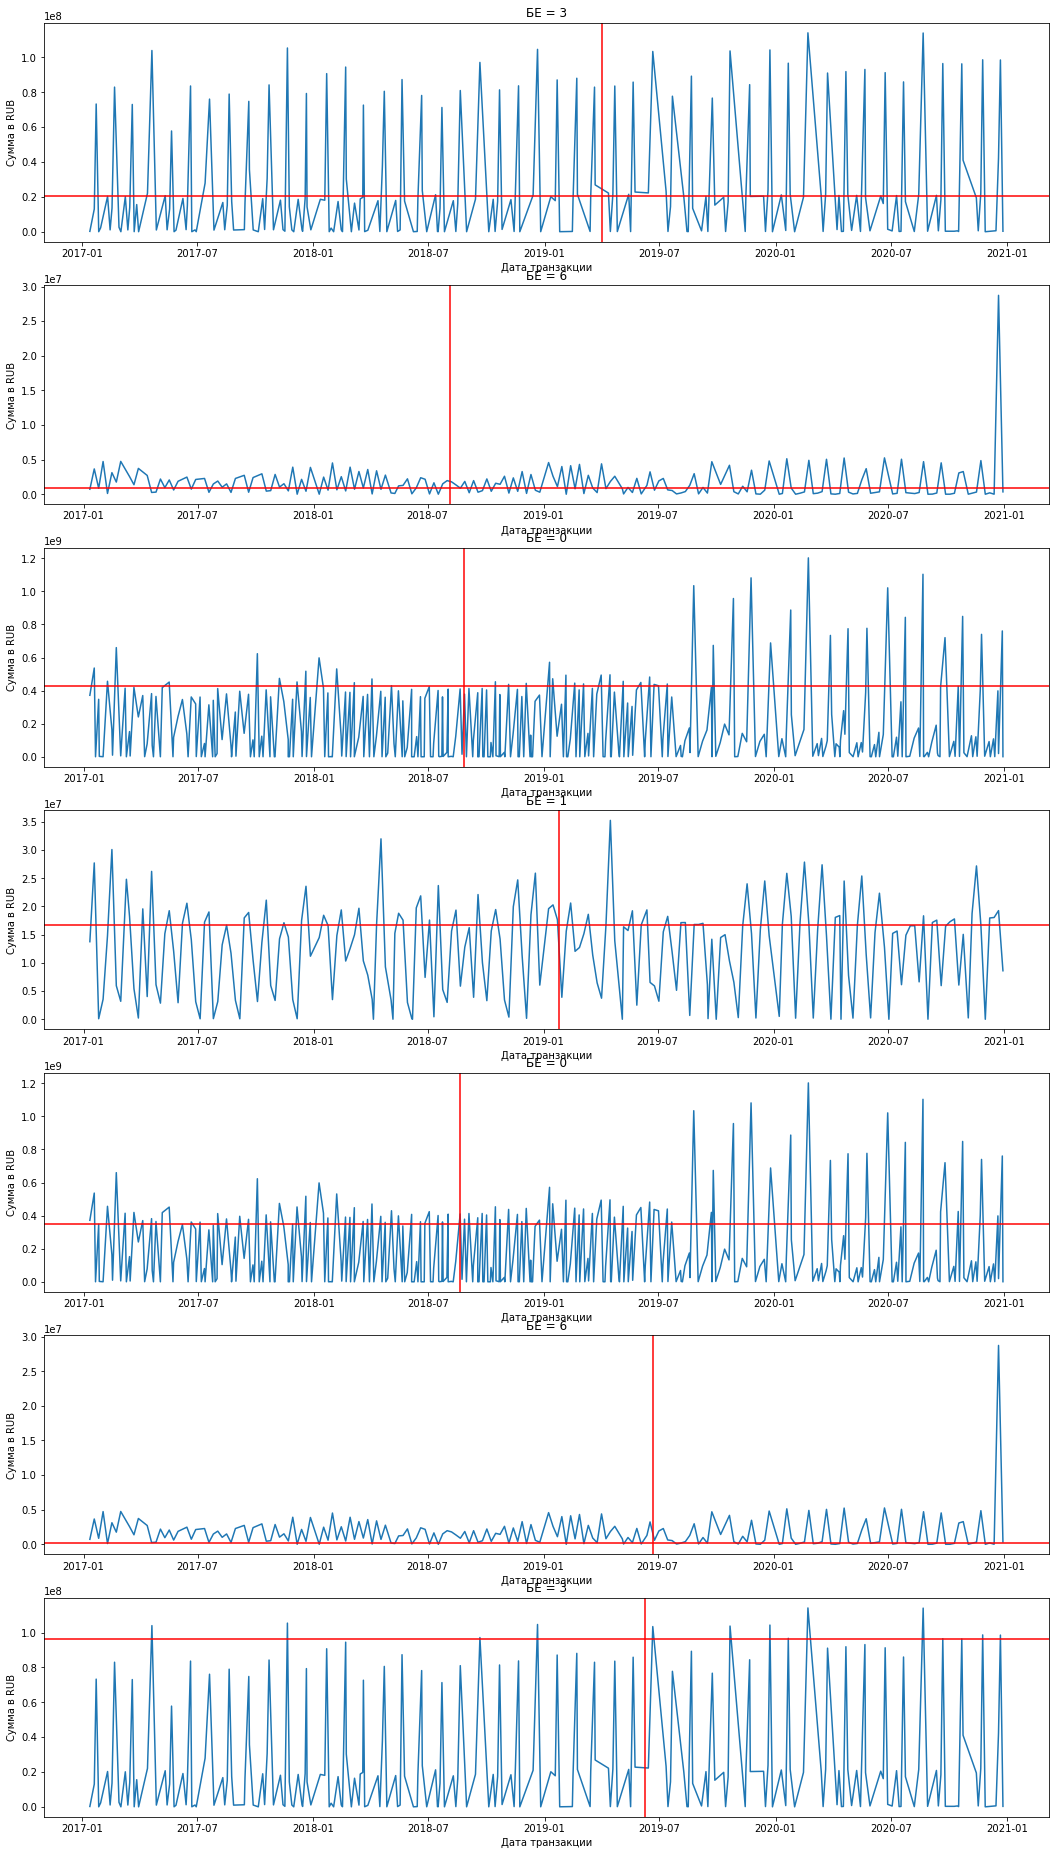

In [75]:
fig, ax = plt.subplots(7, 1, figsize=(18, 33))
for i, data in enumerate(zip(dates, X_sample)):
    date_be = data[0]
    be, sm_be = int(data[1][0]), data[1][1]
    print(f"Предсказанная Дата - {date_be}\nБЕ - {be}\nСумма - {sm_be}")
    train_be = train[train["БЕ"] == be].reset_index(drop=True)
    date = train_be["Дата транзакции"]
    sm = train_be["Сумма в RUB"]
    ax[i].set_title('БЕ = ' + str(be))
    ax[i].set_xlabel('Дата транзакции')
    ax[i].set_ylabel('Сумма в RUB')
    ax[i].plot(date, sm)
    ax[i].axhline(y=sm_be, color = 'red')
    ax[i].axvline(x=date_be, color = 'red')


Дата - 2019-04-02 00:00:00
БЕ - 3
Сумма - 20254777.07006369
Дата - 2018-08-05 00:00:00
БЕ - 6
Сумма - 906369.4267515924
Дата - 2018-08-27 00:00:00
БЕ - 0
Сумма - 425051048.7898089
Дата - 2019-01-25 00:00:00
БЕ - 1
Сумма - 16651622.50955414
Дата - 2018-08-21 00:00:00
БЕ - 0
Сумма - 347604465.75159234
Дата - 2019-06-24 00:00:00
БЕ - 6
Сумма - 167755.15923566878
Дата - 2019-06-09 00:00:00
БЕ - 3
Сумма - 96482686.07006368